In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tqdm

In [3]:
data = pd.read_csv('./carprice.csv')
df = pd.DataFrame(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
array = df.to_numpy()

In [6]:
train_data = df

array([[<AxesSubplot: title={'center': 'car_ID'}>,
        <AxesSubplot: title={'center': 'symboling'}>,
        <AxesSubplot: title={'center': 'wheelbase'}>,
        <AxesSubplot: title={'center': 'carlength'}>],
       [<AxesSubplot: title={'center': 'carwidth'}>,
        <AxesSubplot: title={'center': 'carheight'}>,
        <AxesSubplot: title={'center': 'curbweight'}>,
        <AxesSubplot: title={'center': 'enginesize'}>],
       [<AxesSubplot: title={'center': 'boreratio'}>,
        <AxesSubplot: title={'center': 'stroke'}>,
        <AxesSubplot: title={'center': 'compressionratio'}>,
        <AxesSubplot: title={'center': 'horsepower'}>],
       [<AxesSubplot: title={'center': 'peakrpm'}>,
        <AxesSubplot: title={'center': 'citympg'}>,
        <AxesSubplot: title={'center': 'highwaympg'}>,
        <AxesSubplot: title={'center': 'price'}>]], dtype=object)

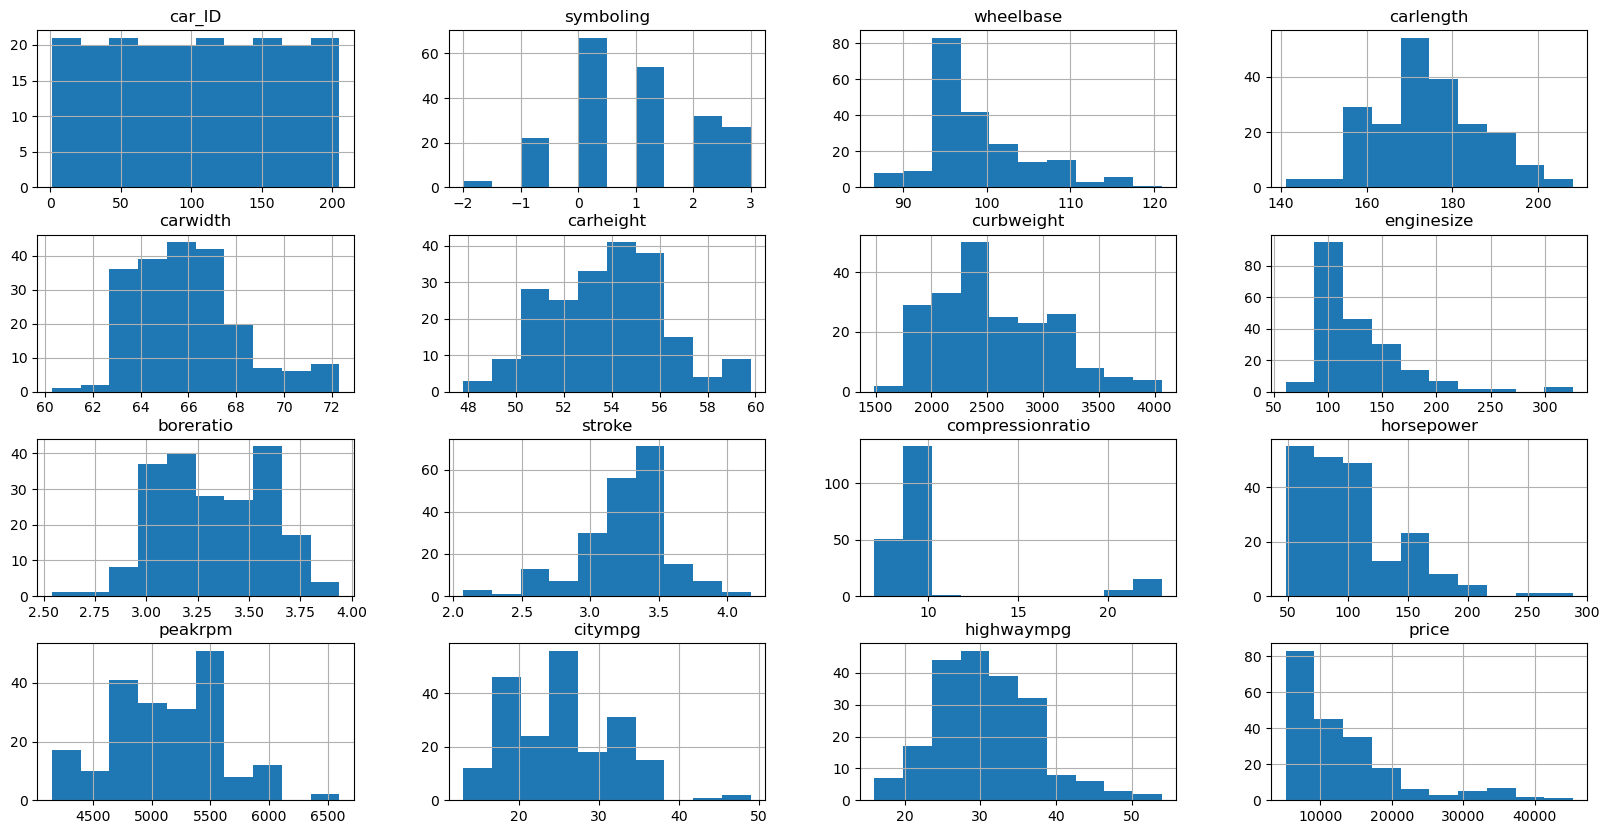

In [7]:
train_data.hist(figsize = (20,10))

In [8]:
train_data.corr()['price']

/tmp/ipykernel_11293/1447781607.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()['price']


car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [9]:
#dropping the tables having very less correlation
train_data = train_data.drop(['symboling', 'stroke', 'compressionratio', 'peakrpm'], axis=1)

train_data

,car_ID,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,4,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,5,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,2952,ohc,four,141,mpfi,3.78,114,23,28,16845.0
201,202,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3049,ohc,four,141,mpfi,3.78,160,19,25,19045.0
202,203,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485.0
203,204,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3217,ohc,six,145,idi,3.01,106,26,27,22470.0


/tmp/ipykernel_11293/4030865306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<AxesSubplot: >

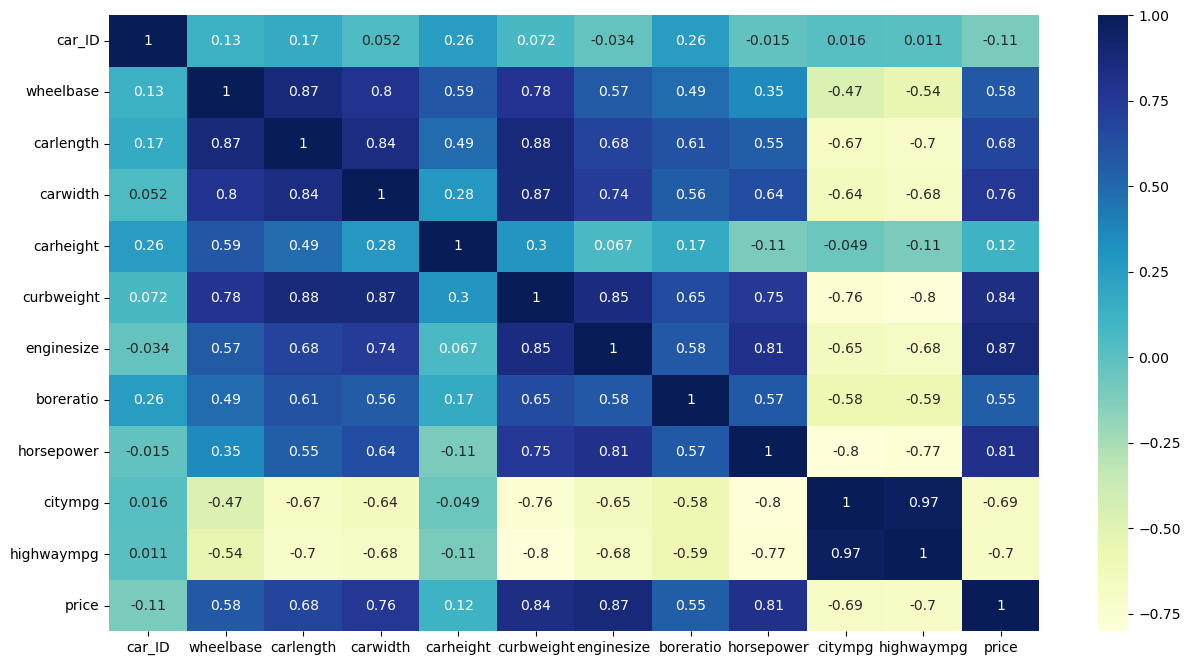

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [11]:
train_data.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [12]:
train_data = pd.get_dummies(data=train_data, columns=['CarName', 'fueltype', 'aspiration', 'carbody', 'doornumber', 'drivewheel', 'enginelocation', 'enginetype','fuelsystem','cylindernumber'])
#train_data = train_data.drop(['CarName', 'fueltype', 'aspiration', 'carbody', 'doornumber', 'drivewheel', 'enginelocation', 'enginetype','fuelsystem'],axis=1)

In [13]:
train_data.info

<bound method DataFrame.info of      car_ID  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1       88.6      168.8      64.1       48.8        2548   
1         2       88.6      168.8      64.1       48.8        2548   
2         3       94.5      171.2      65.5       52.4        2823   
3         4       99.8      176.6      66.2       54.3        2337   
4         5       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...       ...        ...         ...   
200     201      109.1      188.8      68.9       55.5        2952   
201     202      109.1      188.8      68.8       55.5        3049   
202     203      109.1      188.8      68.9       55.5        3012   
203     204      109.1      188.8      68.9       55.5        3217   
204     205      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  horsepower  citympg  ...  fuelsystem_mpfi  \
0           130       3.47         111       21  ...  

In [14]:
y = train_data['price'].to_numpy()
X = train_data.drop(['price'],axis=1).to_numpy()

In [15]:
#feature normalization
X = X / X.max()

In [16]:
X.shape

(205, 196)

In [79]:
#initialize parameters
m = X[:,1].size
n = X[1,:].size
y = y.reshape([m,1])
x = np.hstack([np.ones_like(y),X])
theta = np.ones([n+1,1])

In [80]:
y.shape

(205, 1)

In [81]:
#cost function
def computecost(x,y,theta):
    j = np.sum(((x@theta)-y)**2)/(2*m)
    return j

In [82]:
#Gradient Descent algorithm
#in this function I used loop to update the theta but as we can see the 
#time taken to run the function is way slower 
#execution time: 40.4 s

def gradient_l(x,y,theta, alpha=0.001, iteration=5000):
    j_history = np.zeros([iteration,1])

    for iter in tqdm.tqdm(range(0,iteration)):
        error = (x@theta)-y
        for i in range(0,n):
            theta[i] = theta[i] - ((alpha/m) * np.sum(error*x[:,i:i+1]) )
        j_history[iter] = computecost(x,y,theta)
    return theta,j_history

In [83]:
#Gradient Descent algorithm
#in this function I replaced the loop with broadcasting using numpy 
#and as a result the execution time is way less in  this function
#execution time: 1.33 s)
def gradient_b(x,y,theta, alpha=0.001, iteration=5000):
    j_history = np.zeros([iteration,1])
    for iter in tqdm.tqdm(range(0,iteration)):
        error = (x@theta)-y
        theta = theta - ((alpha/m) * (x.T @ error))
        j_history[iter] = computecost(x,y,theta)
    return theta,j_history

In [59]:
l_theta, _ = gradient_l(x, y, np.zeros_like(theta), iteration=1)
b_theta, _ = gradient_b(x, y, np.zeros_like(theta), iteration=1)
np.sum(np.abs((l_theta - b_theta)))




100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.47it/s]



100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 234.57it/s]


6.248125442593228e-05

In [70]:
%%time
theta,J=gradient_l(x,y,theta)




  0%|                                                                                | 0/5000 [00:00<?, ?it/s]


  0%|▏                                                                     | 17/5000 [00:00<00:31, 160.00it/s]


  1%|▍                                                                     | 34/5000 [00:00<00:31, 158.38it/s]


  1%|▋                                                                     | 50/5000 [00:00<00:31, 155.12it/s]


  1%|▉                                                                     | 66/5000 [00:00<00:34, 143.49it/s]


  2%|█▏                                                                    | 82/5000 [00:00<00:33, 147.31it/s]


  2%|█▎                                                                    | 98/5000 [00:00<00:32, 150.67it/s]


  2%|█▌                                                                   | 114/5000 [00:00<00:33, 146.84it/s]


  3%|█▊                                                                   | 130/5000 [00:00<0

 22%|██████████████▊                                                     | 1086/5000 [00:07<00:24, 156.97it/s]


 22%|███████████████                                                     | 1103/5000 [00:07<00:24, 158.37it/s]


 22%|███████████████▏                                                    | 1121/5000 [00:07<00:23, 162.70it/s]


 23%|███████████████▌                                                    | 1143/5000 [00:07<00:21, 176.91it/s]


 23%|███████████████▊                                                    | 1163/5000 [00:07<00:20, 183.30it/s]


 24%|████████████████                                                    | 1182/5000 [00:08<00:20, 182.97it/s]


 24%|████████████████▎                                                   | 1201/5000 [00:08<00:21, 179.55it/s]


 24%|████████████████▌                                                   | 1222/5000 [00:08<00:20, 188.05it/s]


 25%|████████████████▉                                                   | 1242/5000 [00:08<00:1

 44%|██████████████████████████████                                      | 2215/5000 [00:15<00:26, 103.41it/s]


 45%|██████████████████████████████▎                                     | 2231/5000 [00:15<00:23, 117.15it/s]


 45%|██████████████████████████████▌                                     | 2246/5000 [00:15<00:21, 125.45it/s]


 45%|██████████████████████████████▋                                     | 2259/5000 [00:15<00:24, 111.84it/s]


 45%|██████████████████████████████▉                                     | 2273/5000 [00:15<00:23, 116.76it/s]


 46%|███████████████████████████████                                     | 2286/5000 [00:15<00:24, 110.56it/s]


 46%|███████████████████████████████▎                                    | 2303/5000 [00:15<00:21, 124.96it/s]


 46%|███████████████████████████████▌                                    | 2321/5000 [00:16<00:19, 137.03it/s]


 47%|███████████████████████████████▊                                    | 2336/5000 [00:16<00:2

 66%|█████████████████████████████████████████████                       | 3315/5000 [00:22<00:12, 131.48it/s]


 67%|█████████████████████████████████████████████▎                      | 3329/5000 [00:22<00:13, 126.14it/s]


 67%|█████████████████████████████████████████████▌                      | 3346/5000 [00:22<00:12, 137.52it/s]


 67%|█████████████████████████████████████████████▋                      | 3362/5000 [00:23<00:11, 142.63it/s]


 68%|█████████████████████████████████████████████▉                      | 3377/5000 [00:23<00:12, 126.51it/s]


 68%|██████████████████████████████████████████████                      | 3391/5000 [00:23<00:12, 127.44it/s]


 68%|██████████████████████████████████████████████▎                     | 3405/5000 [00:23<00:13, 120.02it/s]


 68%|██████████████████████████████████████████████▌                     | 3420/5000 [00:23<00:12, 127.07it/s]


 69%|██████████████████████████████████████████████▊                     | 3439/5000 [00:23<00:1

 90%|█████████████████████████████████████████████████████████████▏      | 4495/5000 [00:30<00:03, 167.17it/s]


 90%|█████████████████████████████████████████████████████████████▎      | 4512/5000 [00:30<00:03, 159.95it/s]


 91%|█████████████████████████████████████████████████████████████▋      | 4534/5000 [00:30<00:02, 175.85it/s]


 91%|█████████████████████████████████████████████████████████████▉      | 4554/5000 [00:30<00:02, 181.32it/s]


 92%|██████████████████████████████████████████████████████████████▏     | 4575/5000 [00:30<00:02, 188.07it/s]


 92%|██████████████████████████████████████████████████████████████▍     | 4594/5000 [00:30<00:02, 187.03it/s]


 92%|██████████████████████████████████████████████████████████████▋     | 4613/5000 [00:30<00:02, 187.36it/s]


 93%|██████████████████████████████████████████████████████████████▉     | 4632/5000 [00:30<00:02, 180.93it/s]


 93%|███████████████████████████████████████████████████████████████▎    | 4652/5000 [00:30<00:0

CPU times: user 1min, sys: 2min 53s, total: 3min 53s
Wall time: 32.9 s


In [84]:
%%time
theta,J=gradient_b(x,y,theta)




  0%|                                                                                | 0/5000 [00:00<?, ?it/s]


 10%|███████                                                             | 518/5000 [00:00<00:00, 5033.48it/s]


 24%|███████████████▉                                                   | 1188/5000 [00:00<00:00, 5993.49it/s]


 36%|███████████████████████▉                                           | 1789/5000 [00:00<00:00, 5496.66it/s]


 49%|████████████████████████████████▉                                  | 2456/5000 [00:00<00:00, 5931.99it/s]


 61%|████████████████████████████████████████▉                          | 3055/5000 [00:00<00:00, 5547.01it/s]


 72%|████████████████████████████████████████████████▍                  | 3617/5000 [00:00<00:00, 5229.11it/s]


 84%|███████████████████████████████████████████████████████▉           | 4177/5000 [00:00<00:00, 5286.28it/s]


100%|███████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00

CPU times: user 2.09 s, sys: 4.61 s, total: 6.7 s
Wall time: 943 ms


In [85]:
J = np.int32(J)

In [86]:
theta[0]

array([8024.50257261])

In [87]:
J

array([[119603929],
       [119343050],
       [119082903],
       ...,
       [ 24919299],
       [ 24918936],
       [ 24918573]], dtype=int32)

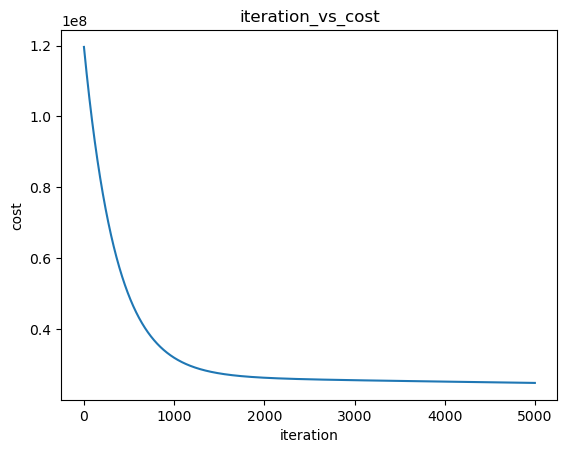

In [88]:
#plotting the iteration vs cost graph
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('iteration_vs_cost')
plt.plot(range(0,len(J)),J)

In [66]:
(x@theta).shape

(205, 1)

In [50]:
#ROUGH
A = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])

In [51]:
theta.shape

(197, 1)

In [52]:
computecost(x,y,theta)

19344182.80324248

In [53]:
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [54]:
A[:,1:1+1]

array([[ 2],
       [ 6],
       [10],
       [14]])

In [55]:
(A[:,2])[..., None]

array([[ 3],
       [ 7],
       [11],
       [15]])

In [56]:
p=A[:1].reshape([4,1])
q=A[1:2].reshape([4,1])
r=A[1]

In [57]:
p

array([[1],
       [2],
       [3],
       [4]])

In [ ]:
q

In [ ]:
r

In [ ]:
p*q

In [ ]:
r@p